# Chicago Car Crashes

**By Yamuna Umapathy & Lotus Baumgarner**

## Business Problem:

This project is about finding the primary contributory causes of car accidents in one of the most busiest city Chicago. Sources say Weather conditions, Heavy Traffic in Peak Hours, Vehicle Condition, Other driver's improper driving behaviours, Late night drivings, Texting while driving are some of the factors which causes car crashes.

Insurance Carriers implementing Good Driving behaviours through their Telematic programs by offering discounts for Consumer's Auto insurance rates, also an alternate technique to reduce Carrier's Loss ratio by reducing car crashes. 

## Dataset:

The dataset comes from Chicago Data Portal https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if/about_data 
This dataset contains 81K rows and 48 columns excluding consumer's personally identifiable information. About half of all crash reports, mostly minor crashes, are self-reported at the police district by the driver(s) involved and the other half are recorded at the scene by the police officer responding to the crash. Many of the crash parameters, including street condition data, weather condition, and posted speed limits, are recorded by 
the reporting officer based on best available information at the time during the crash. 


## 1. Data Exploration & Data Cleaning:

In [112]:
# Importing All Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [28]:
crash_df = pd.read_csv("data/Traffic_Crashes.csv")
crash_df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,9/5/2023 19:05,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,9/22/2023 18:45,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,7/29/2023 14:45,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,8/9/2023 23:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,8/18/2023 12:50,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


In [29]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814170 entries, 0 to 814169
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                814170 non-null  object 
 1   CRASH_DATE_EST_I               60890 non-null   object 
 2   CRASH_DATE                     814170 non-null  object 
 3   POSTED_SPEED_LIMIT             814170 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         814170 non-null  object 
 5   DEVICE_CONDITION               814170 non-null  object 
 6   WEATHER_CONDITION              814170 non-null  object 
 7   LIGHTING_CONDITION             814170 non-null  object 
 8   FIRST_CRASH_TYPE               814170 non-null  object 
 9   TRAFFICWAY_TYPE                814170 non-null  object 
 10  LANE_CNT                       199008 non-null  float64
 11  ALIGNMENT                      814170 non-null  object 
 12  ROADWAY_SURFACE_COND          

In [30]:
crash_df.isna().sum()

CRASH_RECORD_ID                       0
CRASH_DATE_EST_I                 753280
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         615162
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       24146
CRASH_TYPE                            0
INTERSECTION_RELATED_I           627422
NOT_RIGHT_OF_WAY_I               776613
HIT_AND_RUN_I                    559380
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0
STREET_DIRECTION                      4


While exporing the dataset, I see some columns which has 80-95% missing values. Deleting those columns which will not be useful for
my analysis. Also `CRASH_RECORD_ID` is long text data, looks like not useful feature. Deleting Column `LOCATION` is combined format of `LATITUDE`
and `LONGITUDE`, also deleting `REPORT_TYPE` with options 'ON SCENE' and 'NOT_ON_SCENE' doesn't look like useful. 

In [31]:
# Making a dataset copy before deleting unnecessary columns
crash1_df = crash_df.copy()

# Deleting folloing columns which has 80-98% missingness CRASH_RECORD_ID, CRASH_DATE_EST_I, LANE_CNT, REPORT_TYPE, PHOTOS_TAKEN_I, STATEMENTS_TAKEN_I,   
# DOORING_I, WORK_ZONE_I, WORK_ZONE_TYPE, WORKERS_PRESENT_I, LOCATION

crash1_df = crash1_df.drop(columns = ['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'LANE_CNT', 'REPORT_TYPE', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 
                                      'WORK_ZONE_I','WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'LOCATION'], axis = 1)
crash1_df.head()

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,...,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
0,9/5/2023 19:05,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",STRAIGHT AND LEVEL,DRY,...,1.0,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN
1,9/22/2023 18:45,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,...,0.0,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN
2,7/29/2023 14:45,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,...,0.0,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902
3,8/9/2023 23:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,0.0,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN
4,8/18/2023 12:50,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,STRAIGHT AND LEVEL,DRY,...,0.0,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN


In [32]:
crash1_df.isna().sum()

CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
CRASH_TYPE                            0
INTERSECTION_RELATED_I           627422
NOT_RIGHT_OF_WAY_I               776613
HIT_AND_RUN_I                    559380
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0
STREET_DIRECTION                      4
STREET_NAME                           1
BEAT_OF_OCCURRENCE                    5
NUM_UNITS                             0
MOST_SEVERE_INJURY                 1787


In [33]:
print(crash1_df['TRAFFIC_CONTROL_DEVICE'].value_counts())
print("\n",crash1_df['WEATHER_CONDITION'].value_counts())
print("\n",crash1_df['LIGHTING_CONDITION'].value_counts())
print("\n",crash1_df['FIRST_CRASH_TYPE'].value_counts())
print("\n",crash1_df['TRAFFICWAY_TYPE'].value_counts())
print("\n",crash1_df['DAMAGE'].value_counts())
print("\n",crash1_df['PRIM_CONTRIBUTORY_CAUSE'].value_counts())
print("\n",crash1_df['MOST_SEVERE_INJURY'].value_counts())

TRAFFIC_CONTROL_DEVICE
NO CONTROLS                 462844
TRAFFIC SIGNAL              225686
STOP SIGN/FLASHER            80833
UNKNOWN                      32606
OTHER                         5525
LANE USE MARKING              1226
YIELD                         1199
OTHER REG. SIGN                904
OTHER WARNING SIGN             667
RAILROAD CROSSING GATE         530
PEDESTRIAN CROSSING SIGN       511
FLASHING CONTROL SIGNAL        325
DELINEATORS                    321
SCHOOL ZONE                    307
POLICE/FLAGMAN                 276
OTHER RAILROAD CROSSING        181
RR CROSSING SIGN               153
NO PASSING                      51
BICYCLE CROSSING SIGN           25
Name: count, dtype: int64

 WEATHER_CONDITION
CLEAR                       638519
RAIN                         71238
UNKNOWN                      44852
SNOW                         28227
CLOUDY/OVERCAST              24111
OTHER                         2592
FREEZING RAIN/DRIZZLE         1694
FOG/SMOKE/HAZE       

In [34]:
print(crash1_df['INJURIES_FATAL'].value_counts())
print("\n",crash1_df['INJURIES_INCAPACITATING'].value_counts())
print("\n", crash1_df['INJURIES_NON_INCAPACITATING'].value_counts())
print("\n", crash1_df['INJURIES_REPORTED_NOT_EVIDENT'].value_counts())
print("\n", crash1_df['INJURIES_NO_INDICATION'].value_counts())

INJURIES_FATAL
0.0    811500
1.0       832
2.0        54
3.0         8
4.0         1
Name: count, dtype: int64

 INJURIES_INCAPACITATING
0.0     798479
1.0      12231
2.0       1269
3.0        282
4.0         98
5.0         26
6.0          7
7.0          1
10.0         1
8.0          1
Name: count, dtype: int64

 INJURIES_NON_INCAPACITATING
0.0     746713
1.0      51469
2.0       9780
3.0       2856
4.0        995
5.0        348
6.0        138
7.0         46
8.0         21
10.0         9
9.0          6
11.0         4
12.0         3
21.0         2
19.0         1
18.0         1
14.0         1
15.0         1
16.0         1
Name: count, dtype: int64

 INJURIES_REPORTED_NOT_EVIDENT
0.0     774393
1.0      29565
2.0       6099
3.0       1577
4.0        492
5.0        172
6.0         45
7.0         22
8.0         11
9.0          9
10.0         6
11.0         2
15.0         2
Name: count, dtype: int64

 INJURIES_NO_INDICATION
2.0     377688
1.0     248994
3.0     102654
4.0      38361
0.0     

In [35]:
print(crash1_df['INTERSECTION_RELATED_I'].value_counts())
print("\n",crash1_df['NOT_RIGHT_OF_WAY_I'].value_counts())
print("\n",crash1_df['HIT_AND_RUN_I'].value_counts())
print("\n",crash1_df['DEVICE_CONDITION'].value_counts())

INTERSECTION_RELATED_I
Y    177874
N      8874
Name: count, dtype: int64

 NOT_RIGHT_OF_WAY_I
Y    34120
N     3437
Name: count, dtype: int64

 HIT_AND_RUN_I
Y    243843
N     10947
Name: count, dtype: int64

 DEVICE_CONDITION
NO CONTROLS                 468252
FUNCTIONING PROPERLY        278833
UNKNOWN                      54247
OTHER                         6241
FUNCTIONING IMPROPERLY        3840
NOT FUNCTIONING               2379
WORN REFLECTIVE MATERIAL       284
MISSING                         94
Name: count, dtype: int64


In [36]:
print("\n",crash1_df['SEC_CONTRIBUTORY_CAUSE'].value_counts())


 SEC_CONTRIBUTORY_CAUSE
NOT APPLICABLE                                                                      334335
UNABLE TO DETERMINE                                                                 294492
FAILING TO REDUCE SPEED TO AVOID CRASH                                               30366
FAILING TO YIELD RIGHT-OF-WAY                                                        25584
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  24993
FOLLOWING TOO CLOSELY                                                                21459
IMPROPER OVERTAKING/PASSING                                                          12461
IMPROPER LANE USAGE                                                                  11421
WEATHER                                                                               9418
IMPROPER TURNING/NO SIGNAL                                                            8302
IMPROPER BACKING                                                 

## 2. Feature Engineering:

This dataset contains more categorical columns, and values are more than 8-20 values, this has to be reduced before preprocessing. Or we end up
with more columns after Ordinal or One Hot encoding. Column `TRAFFIC_CONTROL_DEVICE` has 19 kind of different categorical values, reducing to 5-6 categories. Similarly `WEATHER_CONDITION` & `FIRST_CRASH_TYPE` has 12-18 values, will be reduced to 5-6.

Choosing our TARGET column as `MOST_SEVERE_INJURY` which has 5 categorical values, this will be changed to 3 options: NO_INJURY, NON_INCAP_INJURY 
and INCAP_INJURY. Both `FATAL` and `INCAPACITATING INJURY` will be joined. `REPORTED, NOT EVIDENT` will be joined with NON_INCAP_INJURY, since we 
don't have evidence if those cases were treated later or comes under 'NO_INJURY' category. Also columns INJURIES_TOTAL, INJURIES_FATAL, 
INJURIES_INCAPACITATING, INJURIES_NON_INCAPACITATING, INJURIES_REPORTED_NOT_EVIDENT, INJURIES_NO_INDICATION & INJURIES_UNKNOWN are same as our
TARGET columns, and have to be excluded from Dataset before splitting X_train, X_test.

Column `CRASH_HOUR` has 24 values from 0-24 as hours, this will be divided to 5 categories: MORNING_PEAK, MIDDAY, AFTERNOON, EVENING_PEAK, NIGHT 
and LATE_NIGHT. Hour of the day for crash is important feature to check at which category value more crashes happen.


In [37]:
# Making a copy before making major changes.
crash2_df = crash1_df.copy()

In [38]:
# Column TRAFFIC_CONTROL_DEVICE update
crash2_df['TRAFFIC_CONTROL_DEVICE'] = crash2_df['TRAFFIC_CONTROL_DEVICE'].replace({'OTHER':'OTHER_SIGN','LANE USE MARKING':'OTHER_SIGN', 'YIELD': 'OTHER_SIGN',  'OTHER REG. SIGN':'OTHER_SIGN',
                                                                             'OTHER WARNING SIGN':'OTHER_SIGN','RAILROAD CROSSING GATE':'OTHER_SIGN', 'PEDESTRIAN CROSSING SIGN':'OTHER_SIGN',
                                                                            'PEDESTRIAN CROSSING SIGN':'OTHER_SIGN', 'FLASHING CONTROL SIGNAL':'OTHER_SIGN',
                                                                            'DELINEATORS': 'OTHER_SIGN', 'SCHOOL ZONE':'OTHER_SIGN', 'POLICE/FLAGMAN':'OTHER_SIGN',
                                                                            'OTHER RAILROAD CROSSING':'OTHER_SIGN', 'RR CROSSING SIGN': 'OTHER_SIGN', 
                                                                            'NO PASSING':'OTHER_SIGN', 'BICYCLE CROSSING SIGN':'OTHER_SIGN'})
crash2_df['TRAFFIC_CONTROL_DEVICE'].value_counts()

TRAFFIC_CONTROL_DEVICE
NO CONTROLS          462844
TRAFFIC SIGNAL       225686
STOP SIGN/FLASHER     80833
UNKNOWN               32606
OTHER_SIGN            12201
Name: count, dtype: int64

In [39]:
# Column WEATHER_CONDITION value updates
crash2_df['WEATHER_CONDITION'] = crash2_df['WEATHER_CONDITION'].replace({'FREEZING RAIN/DRIZZLE':'FRZ_RAIN/SLEET', 'SLEET/HAIL':'FRZ_RAIN/SLEET',
                                                                         'FOG/SMOKE/HAZE':'OTHER', 'BLOWING SNOW':'OTHER', 
                                                                         'SEVERE CROSS WIND GATE':'OTHER', 'BLOWING SAND, SOIL, DIRT':'OTHER'})

crash2_df['WEATHER_CONDITION'].value_counts()

WEATHER_CONDITION
CLEAR              638519
RAIN                71238
UNKNOWN             44852
SNOW                28227
CLOUDY/OVERCAST     24111
OTHER                4528
FRZ_RAIN/SLEET       2695
Name: count, dtype: int64

In [40]:
# Column FIRST_CRASH_TYPE
crash2_df['FIRST_CRASH_TYPE'] = crash2_df['FIRST_CRASH_TYPE'].replace({'SIDESWIPE SAME DIRECTION':'SIDESWIPE', 'SIDESWIPE OPPOSITE DIRECTION':'SIDESWIPE',
                                                            'REAR TO FRONT':'REAR_END','REAR END':'REAR_END', 'REAR TO SIDE':'REAR_END', 'REAR TO REAR':'REAR_END',
                                                            'PEDESTRIAN':'PED/BICYCLIST','PEDALCYCLIST':'PED/BICYCLIST','OTHER OBJECT':'OTHER', 
                                                            'OTHER NONCOLLISION':'OTHER', 'ANIMAL':'OTHER'}) 

crash2_df['FIRST_CRASH_TYPE'].value_counts()

FIRST_CRASH_TYPE
REAR_END                196125
PARKED MOTOR VEHICLE    189232
SIDESWIPE               135665
TURNING                 116364
ANGLE                    88565
FIXED OBJECT             38259
PED/BICYCLIST            31250
OTHER                    11222
HEAD ON                   6944
OVERTURNED                 499
TRAIN                       45
Name: count, dtype: int64

In [41]:
# Target Column 'MOST_SEVERE_INJURY' update
crash2_df['MOST_SEVERE_INJURY'] = crash2_df['MOST_SEVERE_INJURY'].replace({'NO INDICATION OF INJURY':'NO_INJURY', 'NONINCAPACITATING INJURY':'NON_INCAP_INJURY',
                                                                     'REPORTED, NOT EVIDENT':'NON_INCAP_INJURY', 'FATAL':'INCAP_INJURY',
                                                                      'INCAPACITATING INJURY':'INCAP_INJURY'})

crash2_df['MOST_SEVERE_INJURY'].value_counts()


MOST_SEVERE_INJURY
NO_INJURY           700415
NON_INCAP_INJURY     97292
INCAP_INJURY         14676
Name: count, dtype: int64

In [42]:
# Dropping columns which are connected to our Target colums:INJURIES_TOTAL, INJURIES_FATAL, 
#INJURIES_INCAPACITATING, INJURIES_NON_INCAPACITATING, INJURIES_REPORTED_NOT_EVIDENT, INJURIES_NO_INDICATION & INJURIES_UNKNOWN
crash2_df = crash2_df.drop(columns = ['INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
                                       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION','INJURIES_UNKNOWN'], axis=1)
crash2_df.head()

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,...,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,NUM_UNITS,MOST_SEVERE_INJURY,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
0,9/5/2023 19:05,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",STRAIGHT AND LEVEL,DRY,...,S,WENTWORTH AVE,225.0,2,INCAP_INJURY,19,3,9,NaN,NaN
1,9/22/2023 18:45,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR_END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,...,S,CHICAGO SKYWAY OB,411.0,2,NO_INJURY,18,6,9,NaN,NaN
2,7/29/2023 14:45,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,...,S,ASHLAND AVE,1235.0,4,NO_INJURY,14,7,7,41.85412,-87.665902
3,8/9/2023 23:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,W,BALMORAL AVE,1650.0,2,NO_INJURY,23,4,8,NaN,NaN
4,8/18/2023 12:50,15,OTHER_SIGN,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR_END,OTHER,STRAIGHT AND LEVEL,DRY,...,W,OHARE ST,1654.0,2,NON_INCAP_INJURY,12,6,8,NaN,NaN


In [43]:
# Column CRASH_HOUR update from 24 values to 7
crash2_df['CRASH_HOUR'] = crash2_df['CRASH_HOUR'].replace({0:'LATE_NIGHT', 1:'LATE_NIGHT', 2: 'LATE_NIGHT', 3: 'LATE_NIGHT', 4: 'EARLY_MORNING',
                                                           5: 'EARLY_MORNING', 6:'EARLY_MORNING', 7:'MORNING_PEAK', 8: 'MORNING_PEAK', 9: 'MORNING_PEAK',
                                                           10: 'MID_DAY', 11:'MID_DAY', 12:'MID_DAY', 13: 'AFTERNOON', 14: 'AFTERNOON', 15: 'AFTERNOON',
                                                           16: 'EVENING_PEAK', 17: 'EVENING_PEAK', 18: 'EVENING_PEAK', 19: 'EVENING_PEAK', 20: 'NIGHT',
                                                           21: 'NIGHT', 22:'NIGHT', 23:'LATE_NIGHT'})
crash2_df['CRASH_HOUR'].value_counts()

CRASH_HOUR
EVENING_PEAK     209730
AFTERNOON        166760
MID_DAY          126051
MORNING_PEAK     114760
NIGHT             80804
LATE_NIGHT        77641
EARLY_MORNING     38424
Name: count, dtype: int64

While exploring the values for Road `ALIGNMENT`, `ROADWAY_SURFACE_CONDITION`,`ROAD_DEFECT`... Most of the crashes 60-80% happened in good road, dry surface condition and no_defect roads. This shows most of the crashes are due to Driver's error, although other factors are due to Vehicle, Weather 
and Roads. As per National Highway Traffic Safety Administration source, 94% of crashes are due to Driver's errors.

Also, column `CRASH_DAY_OF_WEEK`, `CRASH_MONTH` has same number of incidents for days or months, these feature are not correlated with our Target, so 
ignoring these columns. Since we are using `LATITUDE` and `LONGITUDE` for location info for crash, ignoring columns `STREET_NO`, `STREET_DIR`, 
`STREET_NAME`. Column `BEAT_OF_OCCURENCE` is the location assigned to police officer, and looks like this feature is CPOD job related column, and not
going to be useful for us to determine our problem.

In [44]:
# Dropping missing values for Target column MOST_SEVERE_INJURY
crash2_df.dropna(subset= ['MOST_SEVERE_INJURY'], inplace=True)

In [45]:
crash2_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 812383 entries, 0 to 814169
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_DATE               812383 non-null  object 
 1   POSTED_SPEED_LIMIT       812383 non-null  int64  
 2   TRAFFIC_CONTROL_DEVICE   812383 non-null  object 
 3   DEVICE_CONDITION         812383 non-null  object 
 4   WEATHER_CONDITION        812383 non-null  object 
 5   LIGHTING_CONDITION       812383 non-null  object 
 6   FIRST_CRASH_TYPE         812383 non-null  object 
 7   TRAFFICWAY_TYPE          812383 non-null  object 
 8   ALIGNMENT                812383 non-null  object 
 9   ROADWAY_SURFACE_COND     812383 non-null  object 
 10  ROAD_DEFECT              812383 non-null  object 
 11  CRASH_TYPE               812383 non-null  object 
 12  INTERSECTION_RELATED_I   186674 non-null  object 
 13  NOT_RIGHT_OF_WAY_I       37290 non-null   object 
 14  HIT_AND_R

## 3. Train Test Split before Preprocessing:

Starting our train test split with columns which has feature engineering done, to start preprocessing steps.

In [46]:
train_columns = ['POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
                 'FIRST_CRASH_TYPE','DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'NUM_UNITS',
                 'CRASH_HOUR', 'LATITUDE', 'LONGITUDE']

In [47]:
# starting train_test_split

X = crash2_df[train_columns]
y = crash2_df['MOST_SEVERE_INJURY']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [48]:
# Checking for Class imbalance
crash2_df['MOST_SEVERE_INJURY'].value_counts()

MOST_SEVERE_INJURY
NO_INJURY           700415
NON_INCAP_INJURY     97292
INCAP_INJURY         14676
Name: count, dtype: int64

Clearly, we see our target column `MOST_SEVERE_INJURY` has class imbalance. After running Base Model and checking right metric, we can look for
Oversampling or Undersampling to run the right model.

In [49]:
X_train.columns

Index(['POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'NUM_UNITS', 'CRASH_HOUR', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')

In [50]:
X_test.shape

(162477, 11)

## 4. Preprocessing using Pipelines:

Columns `TRAFFIC_CONTROL_DEVICE`, `DEVICE_CONDITION`, `WEATHER_CONDITION`, `LIGHTING_CONDITION`, `FIRST_CRASH_TYPE`, `TRAFFICWAY_TYPE`, `DAMAGE`, `PRIM_CONTRIBUTORY_CAUSE`, `SEC_CONTRIBUTORY_CAUSE` and `CRASH_HOUR` are categorical columns, we are using One_Hot_Encoder for categorical columns. Numerical columns are `POSTED_SPEED_LIMIT`, `NUM_UNITS`, `LATITUDE` & `LONGITUDE`. Since columns `LATITUDE` & `LONGITUDE`has missing values, using
Simple Imputer to fill missing values.

Using Pipelines to apply Simple Imputer and One Hot Encoder to train columns.

In [74]:
num_Pipe = Pipeline([('imputer', SimpleImputer(strategy = 'most_frequent'))])
category_Pipe = Pipeline([('ohe', OneHotEncoder(drop = 'first', sparse = False))])


In [78]:
ct = ColumnTransformer(
          [('num1', 'passthrough', ['POSTED_SPEED_LIMIT']),
         ("category", category_Pipe, ['TRAFFIC_CONTROL_DEVICE', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
                 'FIRST_CRASH_TYPE', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE','CRASH_HOUR']),
         ("num", num_Pipe, ['LATITUDE', 'LONGITUDE'])])
     

In [79]:
ct

ColumnTransformer(transformers=[('num1', 'passthrough', ['POSTED_SPEED_LIMIT']),
                                ('category',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False))]),
                                 ['TRAFFIC_CONTROL_DEVICE', 'WEATHER_CONDITION',
                                  'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
                                  'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
                                  'CRASH_HOUR']),
                                ('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['LATITUDE', 'LONGITUDE'])])

In [80]:
ct.fit(X_train, y_train)
X_train_proc = ct.transform(X_train)
X_train_proc.shape

(649906, 75)

In [81]:
X_test_proc = ct.transform(X_test)
X_test_proc.shape

(162477, 75)

In [95]:
ohe_col = ct.named_transformers_['category'].named_steps['ohe'].get_feature_names_out()
ohe_col

array(['TRAFFIC_CONTROL_DEVICE_OTHER_SIGN',
       'TRAFFIC_CONTROL_DEVICE_STOP SIGN/FLASHER',
       'TRAFFIC_CONTROL_DEVICE_TRAFFIC SIGNAL',
       'TRAFFIC_CONTROL_DEVICE_UNKNOWN',
       'WEATHER_CONDITION_CLOUDY/OVERCAST',
       'WEATHER_CONDITION_FRZ_RAIN/SLEET', 'WEATHER_CONDITION_OTHER',
       'WEATHER_CONDITION_RAIN', 'WEATHER_CONDITION_SNOW',
       'WEATHER_CONDITION_UNKNOWN',
       'LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD',
       'LIGHTING_CONDITION_DAWN', 'LIGHTING_CONDITION_DAYLIGHT',
       'LIGHTING_CONDITION_DUSK', 'LIGHTING_CONDITION_UNKNOWN',
       'FIRST_CRASH_TYPE_FIXED OBJECT', 'FIRST_CRASH_TYPE_HEAD ON',
       'FIRST_CRASH_TYPE_OTHER', 'FIRST_CRASH_TYPE_OVERTURNED',
       'FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE',
       'FIRST_CRASH_TYPE_PED/BICYCLIST', 'FIRST_CRASH_TYPE_REAR_END',
       'FIRST_CRASH_TYPE_SIDESWIPE', 'FIRST_CRASH_TYPE_TRAIN',
       'FIRST_CRASH_TYPE_TURNING', 'DAMAGE_$501 - $1,500',
       'DAMAGE_OVER $1,500',
       'PRIM_CONTRIBUTORY

In [96]:
num_col = ct.named_transformers_['num'].named_steps['imputer'].get_feature_names_out()
num_col

array(['LATITUDE', 'LONGITUDE'], dtype=object)

In [97]:
column1 = ['POSTED_SPEED_LIMIT']
columnlist = column1+list(ohe_col) + list(num_col)
columnlist

['POSTED_SPEED_LIMIT',
 'TRAFFIC_CONTROL_DEVICE_OTHER_SIGN',
 'TRAFFIC_CONTROL_DEVICE_STOP SIGN/FLASHER',
 'TRAFFIC_CONTROL_DEVICE_TRAFFIC SIGNAL',
 'TRAFFIC_CONTROL_DEVICE_UNKNOWN',
 'WEATHER_CONDITION_CLOUDY/OVERCAST',
 'WEATHER_CONDITION_FRZ_RAIN/SLEET',
 'WEATHER_CONDITION_OTHER',
 'WEATHER_CONDITION_RAIN',
 'WEATHER_CONDITION_SNOW',
 'WEATHER_CONDITION_UNKNOWN',
 'LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD',
 'LIGHTING_CONDITION_DAWN',
 'LIGHTING_CONDITION_DAYLIGHT',
 'LIGHTING_CONDITION_DUSK',
 'LIGHTING_CONDITION_UNKNOWN',
 'FIRST_CRASH_TYPE_FIXED OBJECT',
 'FIRST_CRASH_TYPE_HEAD ON',
 'FIRST_CRASH_TYPE_OTHER',
 'FIRST_CRASH_TYPE_OVERTURNED',
 'FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE',
 'FIRST_CRASH_TYPE_PED/BICYCLIST',
 'FIRST_CRASH_TYPE_REAR_END',
 'FIRST_CRASH_TYPE_SIDESWIPE',
 'FIRST_CRASH_TYPE_TRAIN',
 'FIRST_CRASH_TYPE_TURNING',
 'DAMAGE_$501 - $1,500',
 'DAMAGE_OVER $1,500',
 'PRIM_CONTRIBUTORY_CAUSE_BICYCLE ADVANCING LEGALLY ON RED LIGHT',
 'PRIM_CONTRIBUTORY_CAUSE_CELL PHO

In [98]:
X_train_proc_df = pd.DataFrame(X_train_proc, columns = columnlist)
X_train_proc_df.columns

Index(['POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE_OTHER_SIGN',
       'TRAFFIC_CONTROL_DEVICE_STOP SIGN/FLASHER',
       'TRAFFIC_CONTROL_DEVICE_TRAFFIC SIGNAL',
       'TRAFFIC_CONTROL_DEVICE_UNKNOWN', 'WEATHER_CONDITION_CLOUDY/OVERCAST',
       'WEATHER_CONDITION_FRZ_RAIN/SLEET', 'WEATHER_CONDITION_OTHER',
       'WEATHER_CONDITION_RAIN', 'WEATHER_CONDITION_SNOW',
       'WEATHER_CONDITION_UNKNOWN',
       'LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD', 'LIGHTING_CONDITION_DAWN',
       'LIGHTING_CONDITION_DAYLIGHT', 'LIGHTING_CONDITION_DUSK',
       'LIGHTING_CONDITION_UNKNOWN', 'FIRST_CRASH_TYPE_FIXED OBJECT',
       'FIRST_CRASH_TYPE_HEAD ON', 'FIRST_CRASH_TYPE_OTHER',
       'FIRST_CRASH_TYPE_OVERTURNED', 'FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE',
       'FIRST_CRASH_TYPE_PED/BICYCLIST', 'FIRST_CRASH_TYPE_REAR_END',
       'FIRST_CRASH_TYPE_SIDESWIPE', 'FIRST_CRASH_TYPE_TRAIN',
       'FIRST_CRASH_TYPE_TURNING', 'DAMAGE_$501 - $1,500',
       'DAMAGE_OVER $1,500',
       'PRIM_CONT

In [99]:
X_test_proc_df = pd.DataFrame(X_test_proc, columns=columnlist)
X_test_proc_df

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE_OTHER_SIGN,TRAFFIC_CONTROL_DEVICE_STOP SIGN/FLASHER,TRAFFIC_CONTROL_DEVICE_TRAFFIC SIGNAL,TRAFFIC_CONTROL_DEVICE_UNKNOWN,WEATHER_CONDITION_CLOUDY/OVERCAST,WEATHER_CONDITION_FRZ_RAIN/SLEET,WEATHER_CONDITION_OTHER,WEATHER_CONDITION_RAIN,WEATHER_CONDITION_SNOW,...,"PRIM_CONTRIBUTORY_CAUSE_VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)",PRIM_CONTRIBUTORY_CAUSE_WEATHER,CRASH_HOUR_EARLY_MORNING,CRASH_HOUR_EVENING_PEAK,CRASH_HOUR_LATE_NIGHT,CRASH_HOUR_MID_DAY,CRASH_HOUR_MORNING_PEAK,CRASH_HOUR_NIGHT,LATITUDE,LONGITUDE
0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,41.782525,-87.630040
1,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.997193,-87.754370
2,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,41.746936,-87.707361
3,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,41.708033,-87.563448
4,15.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,41.743377,-87.731572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162472,30.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,41.910466,-87.684845
162473,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,41.779394,-87.663135
162474,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,41.906117,-87.677465
162475,30.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.975563,-87.735698


In [103]:
model1 = RandomForestClassifier(n_estimators = 50, random_state= 42)


In [104]:
model1.fit(X_train_proc_df, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [109]:
y_pred = model1.predict(X_test_proc_df)
y_pred

array(['NO_INJURY', 'NO_INJURY', 'NO_INJURY', ..., 'NO_INJURY',
       'NO_INJURY', 'NO_INJURY'], dtype=object)

In [113]:
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

    INCAP_INJURY       0.16      0.03      0.06      2998
NON_INCAP_INJURY       0.47      0.26      0.33     19211
       NO_INJURY       0.90      0.96      0.93    140268

        accuracy                           0.86    162477
       macro avg       0.51      0.42      0.44    162477
    weighted avg       0.83      0.86      0.84    162477



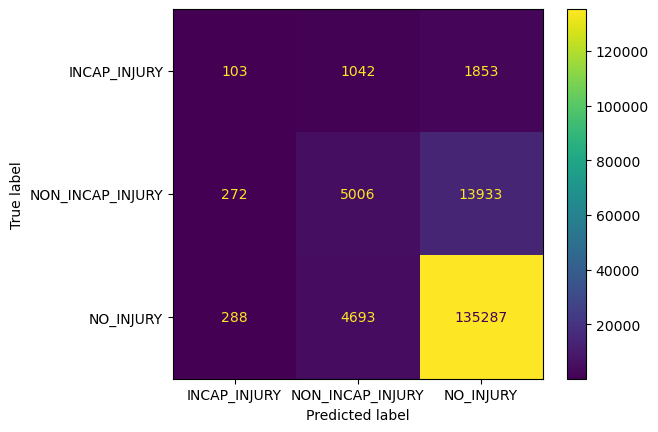

In [114]:
ConfusionMatrixDisplay.from_estimator(model1, X_test_proc_df,y_test);